# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


In [1]:
! conda install -y matplotlib==2.2

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    graphite2:   1.3.11-0                                   conda-forge
    kiwisolver:  1.0.1-py36_1                               conda-forge

The following packages will be UPDATED:

    cairo:       1.14.6-4                                   conda-forge --> 1.14.10-0           conda-forge
    fontconfig:  2.12.1-4                                   conda-forge --> 2.12.6-0            conda-forge
    freetype:    2.7-1                                      conda-forge --> 2.8.1-0             conda-forge
    glib:        2.51.4-0                                   conda-forge --> 2.55.0-0            conda-forge
    harfbuzz:    1.3.4-2                                    conda-forge --> 1.7.6-0             conda-forge
    matplotlib:  2.1.0-py36_0                               conda-forge --> 2.2.0-py36_0      

In [19]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tests


  Running setup.py bdist_wheel for tests ... done
  Stored in directory: /root/.cache/pip/wheels/b9/07/4a/133ea327c1bd15f2e69d309edb2e7d1a8e85ea410d5894eb3e
Successfully built tests
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

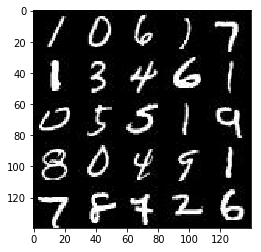

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

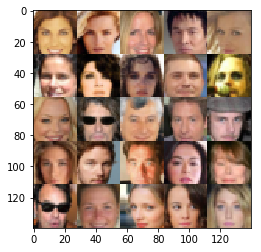

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [20]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [21]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [22]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_dim
        
        out = tf.tanh(logits)
        
    return out    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [23]:
def model_loss(input_real, input_z, out_channel_dim, alpha = 0.9):
    
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * alpha))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss   


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [24]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Update weights and biases
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize Model
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [31]:
class GAN:
    def __init__(self, data_shape, z_dim, learning_rate, beta1=0.5):
        
        self.input_real, self.input_z,self.learning_rate = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
        
        self.d_loss, self.g_loss = model_loss(self.input_real, self.input_z, data_shape[3])
        
        self.d_opt, self.g_opt = model_opt(self.d_loss, self.g_loss, learning_rate, beta1)

In [32]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,print_every=10,show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    net=GAN(data_shape,z_dim,learning_rate, beta1=beta1)
    saver = tf.train.Saver()
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for steps,batch_images in enumerate(get_batches(batch_size)):
                # TODO: Train Model
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: (batch_images*2.0), net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_real: (batch_images*2.0), net.input_z: batch_z})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: (batch_images*2)})
                    train_loss_g = net.g_loss.eval({net.input_real: (batch_images*2.0), net.input_z: batch_z})
 
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
            
                if steps % show_every == 0:
                    show_generator_output(sess=sess,
                                          image_mode=data_image_mode,
                                          input_z=net.input_z,
                                         n_images=10,
                                             out_channel_dim=data_shape[3])
    #plot losses
    fig,ax=pyplot.subplots()
    losses=np.array(losses)
    pyplot.plot(losses.T[0],label='Discriminator')
    pyplot.plot(losses.T[1],label='Generator')
    pyplot.legend()

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 25.5411... Generator Loss: 0.0000


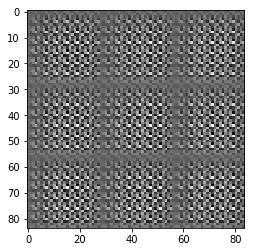

Epoch 1/2... Discriminator Loss: 2.8693... Generator Loss: 0.1855
Epoch 1/2... Discriminator Loss: 0.8136... Generator Loss: 8.7740
Epoch 1/2... Discriminator Loss: 1.7279... Generator Loss: 0.9533
Epoch 1/2... Discriminator Loss: 2.1333... Generator Loss: 0.3327
Epoch 1/2... Discriminator Loss: 0.4355... Generator Loss: 3.6192
Epoch 1/2... Discriminator Loss: 0.8883... Generator Loss: 1.3548
Epoch 1/2... Discriminator Loss: 1.4836... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 1.6750... Generator Loss: 3.7092
Epoch 1/2... Discriminator Loss: 1.6521... Generator Loss: 0.4459
Epoch 1/2... Discriminator Loss: 1.0650... Generator Loss: 3.5765


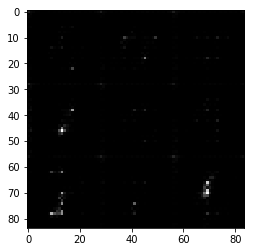

Epoch 1/2... Discriminator Loss: 1.3960... Generator Loss: 0.5999
Epoch 1/2... Discriminator Loss: 1.0416... Generator Loss: 1.6033
Epoch 1/2... Discriminator Loss: 0.8453... Generator Loss: 1.6901
Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 0.9849
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 1.0465
Epoch 1/2... Discriminator Loss: 1.5216... Generator Loss: 0.4878
Epoch 1/2... Discriminator Loss: 1.6898... Generator Loss: 2.7632
Epoch 1/2... Discriminator Loss: 0.9938... Generator Loss: 1.1087
Epoch 1/2... Discriminator Loss: 1.1620... Generator Loss: 1.1876
Epoch 1/2... Discriminator Loss: 1.8289... Generator Loss: 2.8032


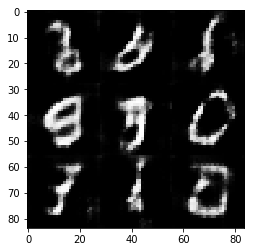

Epoch 1/2... Discriminator Loss: 1.1952... Generator Loss: 0.8070
Epoch 1/2... Discriminator Loss: 1.2048... Generator Loss: 1.1556
Epoch 1/2... Discriminator Loss: 1.8912... Generator Loss: 0.2857
Epoch 1/2... Discriminator Loss: 1.3776... Generator Loss: 0.5463
Epoch 1/2... Discriminator Loss: 1.2965... Generator Loss: 0.6599
Epoch 1/2... Discriminator Loss: 1.2028... Generator Loss: 1.8957
Epoch 1/2... Discriminator Loss: 1.5697... Generator Loss: 2.0491
Epoch 1/2... Discriminator Loss: 1.0946... Generator Loss: 1.1026
Epoch 1/2... Discriminator Loss: 1.5126... Generator Loss: 0.4656
Epoch 1/2... Discriminator Loss: 1.1577... Generator Loss: 1.3267


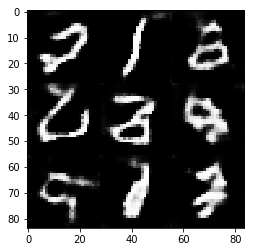

Epoch 1/2... Discriminator Loss: 1.2759... Generator Loss: 0.8173
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 1.0612
Epoch 1/2... Discriminator Loss: 1.1384... Generator Loss: 0.9615
Epoch 1/2... Discriminator Loss: 1.1725... Generator Loss: 1.0064
Epoch 1/2... Discriminator Loss: 1.1384... Generator Loss: 0.9325
Epoch 1/2... Discriminator Loss: 1.9423... Generator Loss: 2.5322
Epoch 1/2... Discriminator Loss: 1.2066... Generator Loss: 0.8522
Epoch 1/2... Discriminator Loss: 1.2441... Generator Loss: 0.7276
Epoch 1/2... Discriminator Loss: 2.1956... Generator Loss: 0.2316
Epoch 1/2... Discriminator Loss: 1.3803... Generator Loss: 1.5860


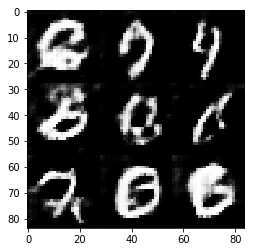

Epoch 1/2... Discriminator Loss: 1.7801... Generator Loss: 0.3379
Epoch 1/2... Discriminator Loss: 1.1331... Generator Loss: 0.9816
Epoch 1/2... Discriminator Loss: 1.2573... Generator Loss: 1.3772
Epoch 1/2... Discriminator Loss: 1.2320... Generator Loss: 1.4725
Epoch 1/2... Discriminator Loss: 1.1765... Generator Loss: 1.2797
Epoch 1/2... Discriminator Loss: 1.1654... Generator Loss: 1.5174
Epoch 2/2... Discriminator Loss: 1.1961... Generator Loss: 0.8807


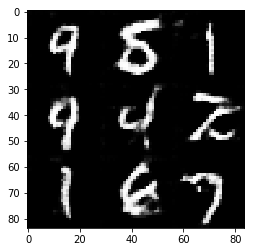

Epoch 2/2... Discriminator Loss: 1.2441... Generator Loss: 1.4485
Epoch 2/2... Discriminator Loss: 1.2266... Generator Loss: 1.3101
Epoch 2/2... Discriminator Loss: 2.1194... Generator Loss: 2.6148
Epoch 2/2... Discriminator Loss: 1.2763... Generator Loss: 1.0253
Epoch 2/2... Discriminator Loss: 1.1734... Generator Loss: 0.7963
Epoch 2/2... Discriminator Loss: 1.1336... Generator Loss: 0.9259
Epoch 2/2... Discriminator Loss: 1.5841... Generator Loss: 2.0891
Epoch 2/2... Discriminator Loss: 1.1817... Generator Loss: 0.9011
Epoch 2/2... Discriminator Loss: 1.9504... Generator Loss: 0.2782
Epoch 2/2... Discriminator Loss: 1.2035... Generator Loss: 0.7932


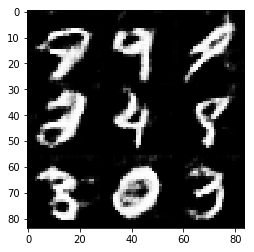

Epoch 2/2... Discriminator Loss: 1.1362... Generator Loss: 0.7946
Epoch 2/2... Discriminator Loss: 1.3466... Generator Loss: 0.6486
Epoch 2/2... Discriminator Loss: 1.4435... Generator Loss: 0.5076
Epoch 2/2... Discriminator Loss: 1.3303... Generator Loss: 1.4796
Epoch 2/2... Discriminator Loss: 1.3237... Generator Loss: 1.6870
Epoch 2/2... Discriminator Loss: 1.1676... Generator Loss: 1.1597
Epoch 2/2... Discriminator Loss: 1.3801... Generator Loss: 1.7425
Epoch 2/2... Discriminator Loss: 1.1538... Generator Loss: 1.2108
Epoch 2/2... Discriminator Loss: 1.3488... Generator Loss: 0.7455
Epoch 2/2... Discriminator Loss: 1.6193... Generator Loss: 0.4057


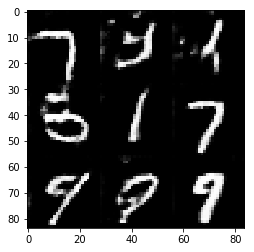

Epoch 2/2... Discriminator Loss: 1.2100... Generator Loss: 1.0529
Epoch 2/2... Discriminator Loss: 1.3576... Generator Loss: 0.6034
Epoch 2/2... Discriminator Loss: 1.1476... Generator Loss: 1.2263
Epoch 2/2... Discriminator Loss: 1.4856... Generator Loss: 0.4978
Epoch 2/2... Discriminator Loss: 1.3355... Generator Loss: 0.6540
Epoch 2/2... Discriminator Loss: 1.1776... Generator Loss: 1.1723
Epoch 2/2... Discriminator Loss: 1.1461... Generator Loss: 1.1016
Epoch 2/2... Discriminator Loss: 1.2191... Generator Loss: 1.1449
Epoch 2/2... Discriminator Loss: 1.5022... Generator Loss: 1.7725
Epoch 2/2... Discriminator Loss: 1.1990... Generator Loss: 0.9655


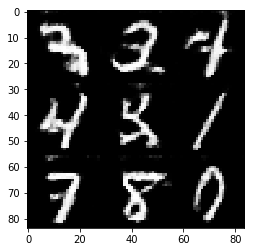

Epoch 2/2... Discriminator Loss: 1.3693... Generator Loss: 0.5884
Epoch 2/2... Discriminator Loss: 1.3507... Generator Loss: 0.6234
Epoch 2/2... Discriminator Loss: 1.3204... Generator Loss: 1.6234
Epoch 2/2... Discriminator Loss: 1.2736... Generator Loss: 0.6737
Epoch 2/2... Discriminator Loss: 1.1165... Generator Loss: 1.2114
Epoch 2/2... Discriminator Loss: 1.2137... Generator Loss: 0.9034
Epoch 2/2... Discriminator Loss: 1.5441... Generator Loss: 0.4788
Epoch 2/2... Discriminator Loss: 1.1930... Generator Loss: 1.3150
Epoch 2/2... Discriminator Loss: 1.1643... Generator Loss: 0.8119
Epoch 2/2... Discriminator Loss: 1.2516... Generator Loss: 0.7063


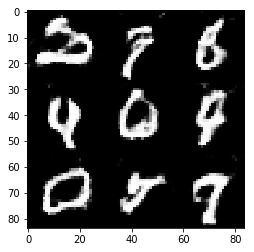

Epoch 2/2... Discriminator Loss: 1.2582... Generator Loss: 1.3156
Epoch 2/2... Discriminator Loss: 1.2793... Generator Loss: 0.7280
Epoch 2/2... Discriminator Loss: 1.5928... Generator Loss: 2.0899
Epoch 2/2... Discriminator Loss: 1.3184... Generator Loss: 0.7234
Epoch 2/2... Discriminator Loss: 1.8520... Generator Loss: 0.2953
Epoch 2/2... Discriminator Loss: 1.2165... Generator Loss: 0.9744


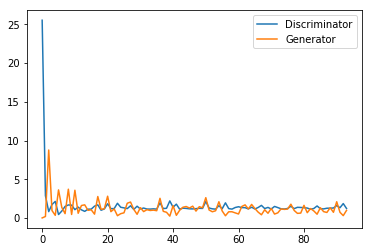

In [34]:
batch_size = 128
z_dim = 100
learning_rate = 0.002  
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 9.8782... Generator Loss: 8.0639


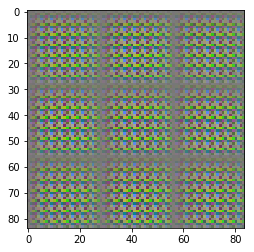

Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 2.6035
Epoch 1/1... Discriminator Loss: 2.1018... Generator Loss: 0.3425
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 1.3041
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 1.4527
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 1.2797
Epoch 1/1... Discriminator Loss: 1.2328... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.5350... Generator Loss: 1.2961
Epoch 1/1... Discriminator Loss: 1.0622... Generator Loss: 1.1663


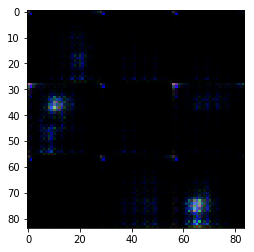

Epoch 1/1... Discriminator Loss: 1.5530... Generator Loss: 2.0907
Epoch 1/1... Discriminator Loss: 1.5062... Generator Loss: 0.5094
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 1.4511
Epoch 1/1... Discriminator Loss: 1.1143... Generator Loss: 2.1446
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 1.3837
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.7179... Generator Loss: 1.2863
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8817
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 1.0008
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 1.1187


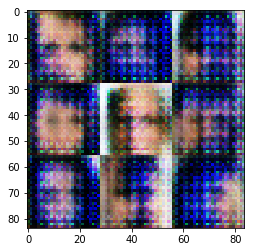

Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 1.1726
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.1778... Generator Loss: 1.0063
Epoch 1/1... Discriminator Loss: 1.2100... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 2.2973
Epoch 1/1... Discriminator Loss: 0.4001... Generator Loss: 3.0486
Epoch 1/1... Discriminator Loss: 0.5363... Generator Loss: 1.9185
Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 1.2684
Epoch 1/1... Discriminator Loss: 0.7526... Generator Loss: 1.2353


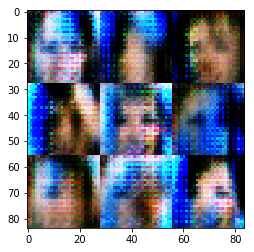

Epoch 1/1... Discriminator Loss: 0.8561... Generator Loss: 1.1470
Epoch 1/1... Discriminator Loss: 1.1888... Generator Loss: 1.7139
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 1.0402
Epoch 1/1... Discriminator Loss: 0.9819... Generator Loss: 1.1855
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 2.4009
Epoch 1/1... Discriminator Loss: 1.8212... Generator Loss: 0.3626
Epoch 1/1... Discriminator Loss: 2.0388... Generator Loss: 0.3290
Epoch 1/1... Discriminator Loss: 0.9045... Generator Loss: 1.0506
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 0.4097... Generator Loss: 2.9041


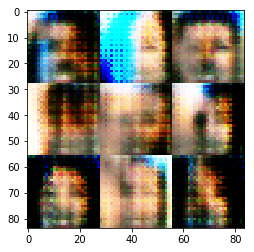

Epoch 1/1... Discriminator Loss: 1.1698... Generator Loss: 3.0480
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 1.3032
Epoch 1/1... Discriminator Loss: 1.6509... Generator Loss: 0.4311
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 2.8154
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 1.4978
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.8982
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 1.3331
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 1.0999
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 1.1810
Epoch 1/1... Discriminator Loss: 1.0102... Generator Loss: 1.0110


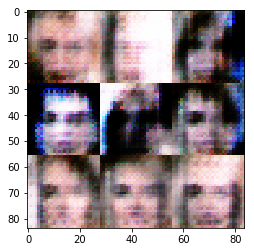

Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 1.3244
Epoch 1/1... Discriminator Loss: 1.1771... Generator Loss: 0.7076
Epoch 1/1... Discriminator Loss: 2.2824... Generator Loss: 0.2525
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.9826
Epoch 1/1... Discriminator Loss: 1.0261... Generator Loss: 1.7621
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 1.1959
Epoch 1/1... Discriminator Loss: 0.9017... Generator Loss: 2.3494
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 0.6466


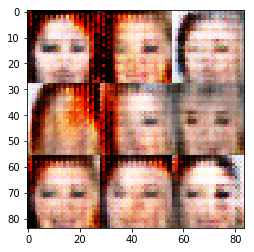

Epoch 1/1... Discriminator Loss: 0.7096... Generator Loss: 1.3621
Epoch 1/1... Discriminator Loss: 1.0905... Generator Loss: 1.5218
Epoch 1/1... Discriminator Loss: 1.1996... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.1230... Generator Loss: 0.7783
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 2.1251
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.5074
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 0.8569... Generator Loss: 1.3257


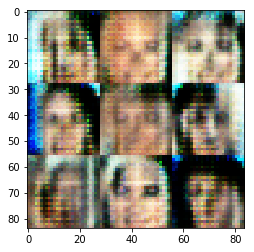

Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 1.3498
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 0.7068... Generator Loss: 1.3178
Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 1.2505
Epoch 1/1... Discriminator Loss: 1.0038... Generator Loss: 0.9949
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 3.1347
Epoch 1/1... Discriminator Loss: 1.5455... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 0.8878... Generator Loss: 1.2295
Epoch 1/1... Discriminator Loss: 1.0290... Generator Loss: 2.4348
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.4675


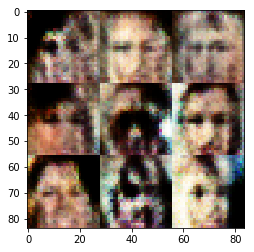

Epoch 1/1... Discriminator Loss: 0.7323... Generator Loss: 1.2632
Epoch 1/1... Discriminator Loss: 2.2667... Generator Loss: 0.2407
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.8331
Epoch 1/1... Discriminator Loss: 1.5226... Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 2.2203... Generator Loss: 0.3274
Epoch 1/1... Discriminator Loss: 1.1528... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.9584... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 1.4461... Generator Loss: 0.5485
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 1.0271


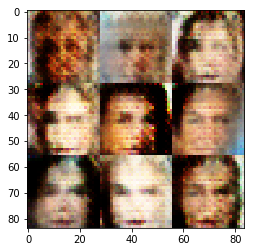

Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 1.5058
Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 1.0644
Epoch 1/1... Discriminator Loss: 0.6419... Generator Loss: 1.4833
Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 0.7596
Epoch 1/1... Discriminator Loss: 1.5515... Generator Loss: 2.0229
Epoch 1/1... Discriminator Loss: 1.1222... Generator Loss: 1.0140
Epoch 1/1... Discriminator Loss: 1.1149... Generator Loss: 1.7457
Epoch 1/1... Discriminator Loss: 0.9853... Generator Loss: 0.9934
Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 1.4247
Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 0.6817


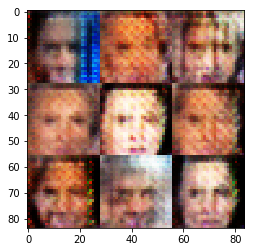

Epoch 1/1... Discriminator Loss: 0.9543... Generator Loss: 1.3480
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.2001... Generator Loss: 2.0216
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 0.7107
Epoch 1/1... Discriminator Loss: 0.7946... Generator Loss: 1.2469
Epoch 1/1... Discriminator Loss: 1.1991... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.6089
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 1.0216
Epoch 1/1... Discriminator Loss: 1.1623... Generator Loss: 1.3929


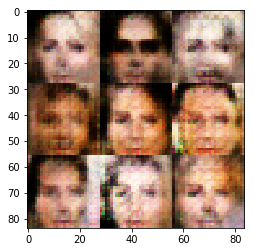

Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 1.1317
Epoch 1/1... Discriminator Loss: 0.6446... Generator Loss: 1.7008
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.8471
Epoch 1/1... Discriminator Loss: 0.8971... Generator Loss: 1.1398
Epoch 1/1... Discriminator Loss: 0.8099... Generator Loss: 1.2783
Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 1.8979
Epoch 1/1... Discriminator Loss: 1.1623... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 0.5703... Generator Loss: 1.9566
Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 1.6664
Epoch 1/1... Discriminator Loss: 1.1061... Generator Loss: 0.8313


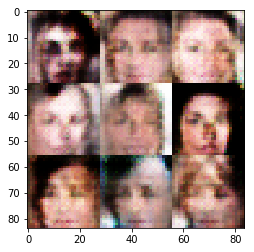

Epoch 1/1... Discriminator Loss: 0.9675... Generator Loss: 1.0796
Epoch 1/1... Discriminator Loss: 0.9393... Generator Loss: 1.2936
Epoch 1/1... Discriminator Loss: 1.1256... Generator Loss: 0.9322
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.9088
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.4636
Epoch 1/1... Discriminator Loss: 1.2170... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.1413... Generator Loss: 1.7730
Epoch 1/1... Discriminator Loss: 1.0851... Generator Loss: 1.1205
Epoch 1/1... Discriminator Loss: 1.0372... Generator Loss: 1.0523
Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 0.9766


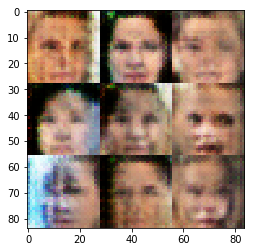

Epoch 1/1... Discriminator Loss: 1.1154... Generator Loss: 1.2881
Epoch 1/1... Discriminator Loss: 0.9710... Generator Loss: 1.0928
Epoch 1/1... Discriminator Loss: 0.8968... Generator Loss: 1.1600
Epoch 1/1... Discriminator Loss: 1.1244... Generator Loss: 1.6716
Epoch 1/1... Discriminator Loss: 1.1924... Generator Loss: 1.4360
Epoch 1/1... Discriminator Loss: 0.5297... Generator Loss: 2.4276
Epoch 1/1... Discriminator Loss: 0.5390... Generator Loss: 2.2965
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 0.9758
Epoch 1/1... Discriminator Loss: 0.6777... Generator Loss: 1.8733
Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 1.5658


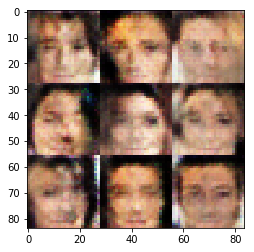

Epoch 1/1... Discriminator Loss: 0.9540... Generator Loss: 0.9614
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 1.4722
Epoch 1/1... Discriminator Loss: 0.8570... Generator Loss: 1.4816
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.5891
Epoch 1/1... Discriminator Loss: 1.1923... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.5281... Generator Loss: 1.3747
Epoch 1/1... Discriminator Loss: 0.8656... Generator Loss: 1.0756
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 0.9391
Epoch 1/1... Discriminator Loss: 0.9973... Generator Loss: 1.3356
Epoch 1/1... Discriminator Loss: 1.0703... Generator Loss: 1.3201


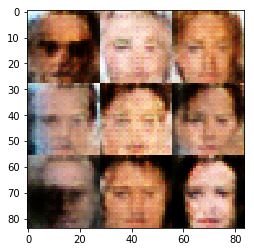

Epoch 1/1... Discriminator Loss: 1.1971... Generator Loss: 1.0368
Epoch 1/1... Discriminator Loss: 1.1440... Generator Loss: 0.7501
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 1.0969
Epoch 1/1... Discriminator Loss: 0.9471... Generator Loss: 1.1450
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 1.1094
Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 1.5216
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 0.9007
Epoch 1/1... Discriminator Loss: 1.1268... Generator Loss: 1.0191


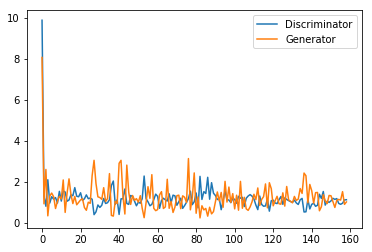

In [35]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

In [36]:
! pip list


DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
altair (1.2.1)
asn1crypto (0.22.0)
audioread (2.1.4)
av (0.3.3)
backports.functools-lru-cache (1.4)
backports.weakref (1.0rc1)
beautifulsoup4 (4.6.0)
bleach (1.5.0)
blinker (1.4)
bokeh (0.12.13)
boto (2.48.0)
boto3 (1.6.2)
botocore (1.9.2)
bresenham (0.2)
bz2file (0.98)
certifi (2017.11.5)
cffi (1.11.2)
chardet (3.0.4)
click (6.7)
cloudpickle (0.2.2)
colour (0.1.5)
conda (4.3.31)
cryptography (2.1.4)
cycler (0.10.0)
Cython (0.25.2)
dask (0.16.1)
decorator (4.0.11)
dill (0.2.7.1)
docutils (0.14)
dronekit (2.9.1)
entrypoints (0.2.3)
et-xmlfile (1.0.1)
eventlet (0.22.0)
fastcache (1.0.2)
Flask (0.12.2)
Flask-SocketIO (2.9.2)
future (0.15.2)
gensim (3.4.0)
greenlet (0.4.12)
gym (0.9.4)
h5py (2.7.0)
heapdict (1.0.0)
html2text (2018.1.9)
html5lib (0.9999999)
idna (2.6)
imageio (2.1.

In [47]:
print("Python Version:\n")
! python --version

Python Version:

Python 3.6.5
